In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Button, CheckButtons

In [12]:
data = Path('values.csv')
value_df = pd.read_csv(data, index_col = 'Date')
data2 = Path('EURUSD.csv')
EURUSD = pd.read_csv(data2, index_col = 'Date')
EURUSD

,Open,High,Low,Close,Change
Date,,,,,
3/01/2000,1.00850,1.02800,1.00550,1.02560,0.00000
4/01/2000,1.02550,1.03400,1.02170,1.03010,0.00450
5/01/2000,1.03040,1.04000,1.02890,1.03150,0.00140
6/01/2000,1.03200,1.04130,1.02830,1.03150,0.00000
7/01/2000,1.03170,1.03330,1.02630,1.02960,-0.00190
...,...,...,...,...,...
10/01/2023,1.07320,1.07593,1.07122,1.07337,0.00016
11/01/2023,1.07337,1.07761,1.07261,1.07568,0.00231
12/01/2023,1.07570,1.08667,1.07315,1.08520,0.00952


In [22]:
data = pd.concat([value_df, EURUSD], axis= 1, join = 'inner')
data

,AU:Australia,BE:Belgium,CA:Canada,CH:Switzerland,DE:Germany,ES:Spain,FR:France,GB:United Kingdom,GR:Greece,HK:Hong Kong SAR,...,NZ:New Zealand,SG:Singapore,TW:Chinese Taipei,US:United States,XM:Euro area,Open,High,Low,Close,Change
Date,,,,,,,,,,,,,,,,,,,,,
3/01/2000,82.11,94.28,74.14,80.11,93.18,95.76,94.56,129.86,96.82,116.41,...,87.49,90.86,114.84,123.10,84.18,1.00850,1.02800,1.00550,1.02560,0.00000
4/01/2000,81.64,94.75,73.74,80.57,93.82,96.11,95.07,129.81,97.11,115.71,...,87.17,90.85,117.08,122.36,85.41,1.02550,1.03400,1.02170,1.03010,0.00450
5/01/2000,81.72,94.94,73.56,80.75,94.09,96.27,95.29,129.63,97.18,115.95,...,86.83,90.95,116.67,122.50,85.95,1.03040,1.04000,1.02890,1.03150,0.00140
6/01/2000,81.80,95.00,73.62,80.80,94.21,96.32,95.37,130.32,97.28,116.22,...,86.73,90.70,116.69,122.77,86.15,1.03200,1.04130,1.02830,1.03150,0.00000
7/01/2000,81.72,94.78,73.36,80.52,93.93,96.15,95.13,130.73,97.16,116.55,...,86.71,91.09,117.03,123.38,85.57,1.03170,1.03330,1.02630,1.02960,-0.00190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/01/2023,85.70,97.17,79.44,134.94,95.85,98.11,97.03,93.18,97.52,110.58,...,106.11,117.10,123.54,126.64,91.44,1.06677,1.06831,1.05198,1.05478,-0.01200
4/01/2023,87.29,97.25,80.06,135.60,95.94,98.16,97.09,93.25,97.56,110.13,...,106.90,117.21,123.47,126.00,91.64,1.05478,1.06349,1.05411,1.06039,0.00561
5/01/2023,87.15,97.32,80.39,135.78,96.03,98.21,97.16,93.07,97.58,110.48,...,106.87,117.49,123.78,126.18,91.83,1.06040,1.06315,1.05150,1.05217,-0.00822


<AxesSubplot:>

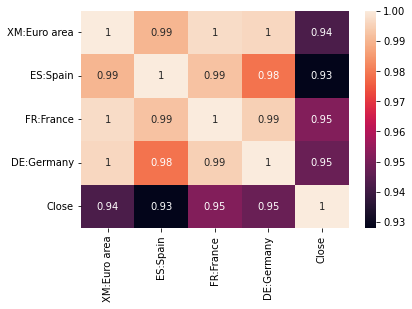

In [60]:
#Linear Regression
sns.heatmap(data[['XM:Euro area','ES:Spain', 'FR:France','DE:Germany', 'Close',]].corr(), annot=True)

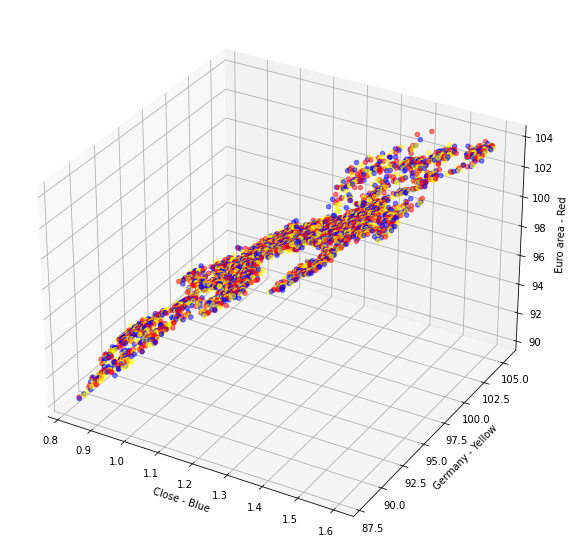

In [64]:
x_height = data['Close']
x_width = data['DE:Germany']
y_weight = data['FR:France']

colors = np.array(['blue', 'yellow', 'red'])
colors = np.tile(colors, len(x_height)//3 + 1)
colors = colors[:len(x_height)]

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection= '3d')
ax.scatter(x_height, x_width, y_weight, c=colors, marker = 'o', alpha = 0.5, depthshade = True)
ax.set_xlabel('Close - Blue')
ax.set_ylabel('Germany - Yellow')
ax.set_zlabel('Euro area - Red')

plt.show()

### Predicting and plotting

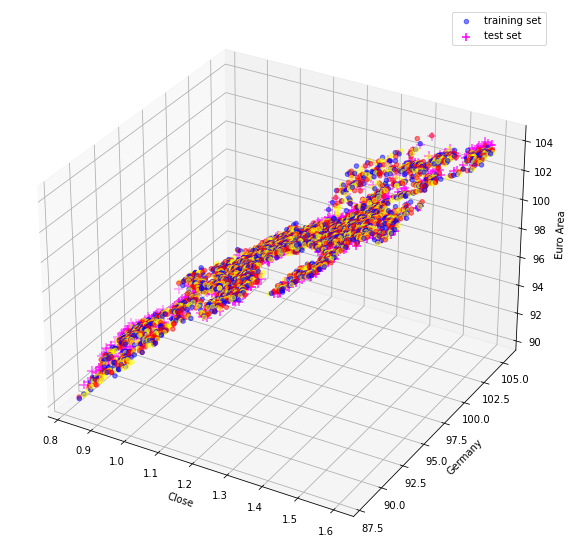

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = np.column_stack((x_height, x_width))
y = y_weight

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

model = LinearRegression().fit(X_train, y_train) 
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_height, x_width, y_weight, c=colors, marker = 'o',alpha = 0.5, label = "training set")
ax.scatter(X_test[:,0], X_test[:,1], y_pred_test, c= 'magenta',marker= '+', s=80, label = 'test set')
ax.set_xlabel('Close')
ax.set_ylabel('Germany')
ax.set_zlabel('Euro Area')
ax.legend()

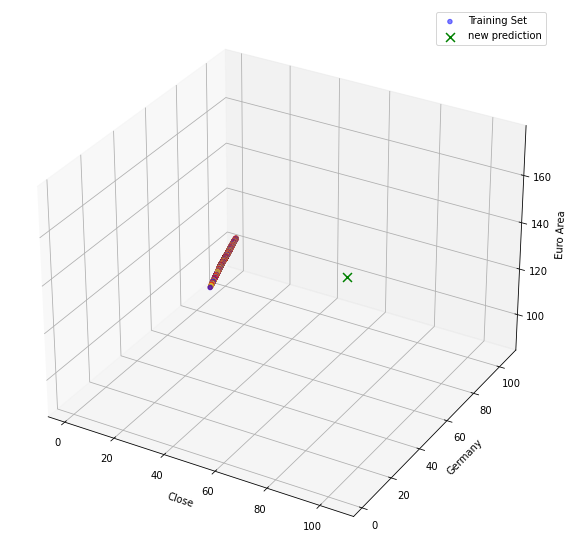

In [93]:
y_pred_new = model.predict([[105, 1.9]])
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_height, x_width, y_weight, c=colors, marker = 'o', alpha = 0.5, label="Training Set")
ax.scatter(105, 1.9, y_pred_new, c='green', marker = 'x', s=80, label = 'new prediction')
ax.set_xlabel('Close')
ax.set_ylabel('Germany')
ax.set_zlabel('Euro Area')
ax.legend()

In [94]:
from sklearn.metrics import mean_absolute_error

training_set_MAE = mean_absolute_error(y_train, y_pred_train)
test_set_MAE = mean_absolute_error(y_test, y_pred_test)

print("Training set MAE", training_set_MAE)
print("Test set MAE", test_set_MAE)

Training set MAE 0.20949782352406982
Test set MAE 0.21705457179211377


In [17]:
#Polynominal Regression

In [18]:
#Lasso Regression

In [19]:
#Ridge Regression

In [20]:
#Perceptron Regression